# Multi-arm bandit test on email delivery

This is an in depth analysis on an email campaign to testify if the campaign has an effective impact on user's funding rate towards this app.

We are requested to answer the following questions:
1. Of all emails sent out at the campaign, find out the best email in terms of funding rates.
2. Find out the correlation between user segments and open rates.
3. Figure out if there is any negative effects of the email campaign.
4. Find out the funding rates and link rates in all treatment groups.
5. Conduct an A/B test to see if this email campaign actually lifted funding rates.

This analysis will answer to these questions accordingly, with some other requests unable to finish given limited amount of time and resource: Time series and funnel analysis.

We will try to answer those questions in the next session.

## 1. Email open rates

Here we'll find out the best email in terms of open rates.

In [1]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here are all the email topics used in this campaign:

In [2]:
# load email list
PO_number_list = ['ml_funding_enables_investing','ml_investing_starts_here','ml_explore_the_app_investing',
                  'ml_funding_faq','ml_user_clustering_emails_fracs','ml_funding_is_safe','ml_picking_an_investment', 
                  'ml_investing_101','ml_diversified_portfolio','ml_explore_the_app_list']

And here are the monitored user events after they received the emails.

In [3]:
# load user events
user_events=pd.read_csv('user_events.csv')
user_events.head()

,user_uuid,group_name,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,...,approved_at,first_funded_at,first_linked_bank_account_at,5d_trading_avg_event_count,2d_non_trading_avg_event_count,20d_trading_avg_event_count,8d_non_trading_avg_event_count,1d_trading_avg_event_count,1d_non_trading_avg_event_count,num_received_email
0,id_2623238174270264636,ML_unfund_exp_control_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14 16:31:59.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_14752263936159847779,ML_unfund_exp_control_D,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,2019-01-29 16:22:26.866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,id_3723259155072282145,ML_unfund_exp_control_D,delivered,delivered,open,open,open,delivered,delivered,delivered,...,2019-02-01 00:01:48.853,2020-12-04 20:41:55.146,2020-12-04 20:41:37.842,53.0,NaN,171.0,NaN,NaN,NaN,6
3,id_9433964625840258739,ML_unfund_exp_control_D,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,2020-03-17 21:02:43.906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,id_17251718038176858460,ML_unfund_exp_control_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-12-30 18:23:15.726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
pd.unique(user_events[PO_number_list].values.ravel())

array([nan, 'delivered', 'open', 'unsubscribe', 'spamreport'],
      dtype=object)

Here are all the delivery count for each email topic:

In [5]:
# delivery count
delivery=pd.DataFrame(columns=['group']+PO_number_list)
delivery['group']=user_events['group_name']
delivery[PO_number_list]=user_events[PO_number_list]
for topic in PO_number_list:
    delivery[topic]=delivery[topic].notnull()
delivery=delivery.groupby('group').sum()
delivery.head()

,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list
group,,,,,,,,,,
20D_Act-5D_Act_D,19230,19257,19252,19251,19253,19251,19271,19265,19241,19249
20D_Act-5D_Act_W,17412,17292,17346,17323,17299,17365,17319,17294,17347,17294
20D_Act_D,19062,19040,19054,19055,19060,19050,19056,19050,19052,19042
20D_Act_W,17202,17132,17148,17107,17052,17156,17108,17097,17156,17094
6M_App-20D_Act-5D_Act_D,19290,19285,19268,19289,19283,19285,19270,19282,19308,19273


And here's the open counts for each email in each treatment group:

In [6]:
# open count
open=pd.DataFrame(columns=['group']+PO_number_list)
open['group']=user_events['group_name']
open[PO_number_list]=user_events[PO_number_list]
for topic in PO_number_list:
    open[topic]=open[topic]=='open'
open=open.groupby('group').sum()
open.head()

,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list
group,,,,,,,,,,
20D_Act-5D_Act_D,3191,3140,3171,5054,3407,3215,3306,3243,3043,3290
20D_Act-5D_Act_W,2873,2875,2843,4545,3117,2878,2924,2869,2829,2879
20D_Act_D,3464,3455,3487,5108,3650,3501,3545,3476,3524,3520
20D_Act_W,3022,3094,3058,4598,3146,3134,3084,3113,3010,3170
6M_App-20D_Act-5D_Act_D,3465,3493,3423,4896,3698,3486,3644,3520,3430,3590


Now the open rates for each email in each treatment groups come out to be as following:

In [7]:
open_rates=open/delivery
open_rates.head()

,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list
group,,,,,,,,,,
20D_Act-5D_Act_D,0.165939,0.163058,0.164710,0.262532,0.176959,0.167004,0.171553,0.168336,0.158152,0.170918
20D_Act-5D_Act_W,0.165001,0.166262,0.163899,0.262368,0.180184,0.165736,0.168832,0.165896,0.163083,0.166474
20D_Act_D,0.181723,0.181460,0.183006,0.268066,0.191501,0.183780,0.186031,0.182467,0.184967,0.184855
20D_Act_W,0.175677,0.180598,0.178330,0.268779,0.184494,0.182677,0.180267,0.182079,0.175449,0.185445
6M_App-20D_Act-5D_Act_D,0.179627,0.181125,0.177652,0.253823,0.191775,0.180762,0.189102,0.182554,0.177647,0.186271


If we visualize all these open rates, we can easily see that of all the emails, there's one email in particular that outperformed others by a significant amount:

<Axes: >

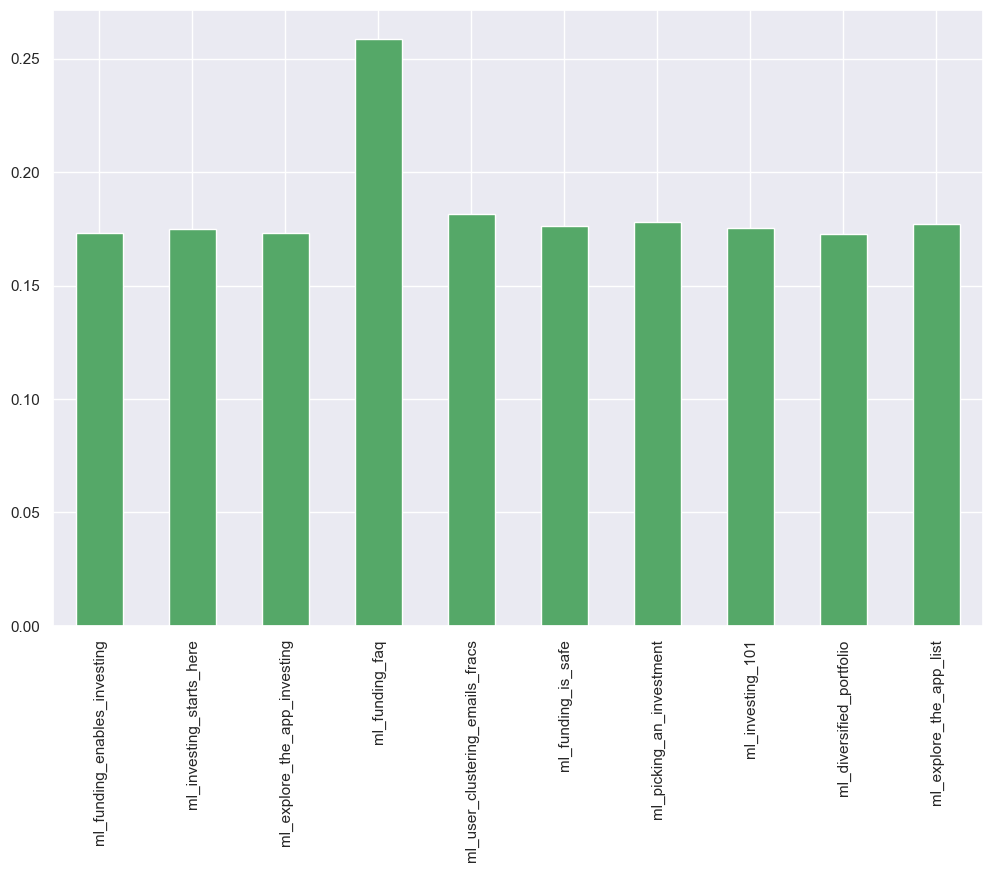

In [8]:
import seaborn as sns
plt.style.use('ggplot')
sns.set(rc={'figure.figsize':(12,8)})
open_rates.mean().plot.bar(color='g')

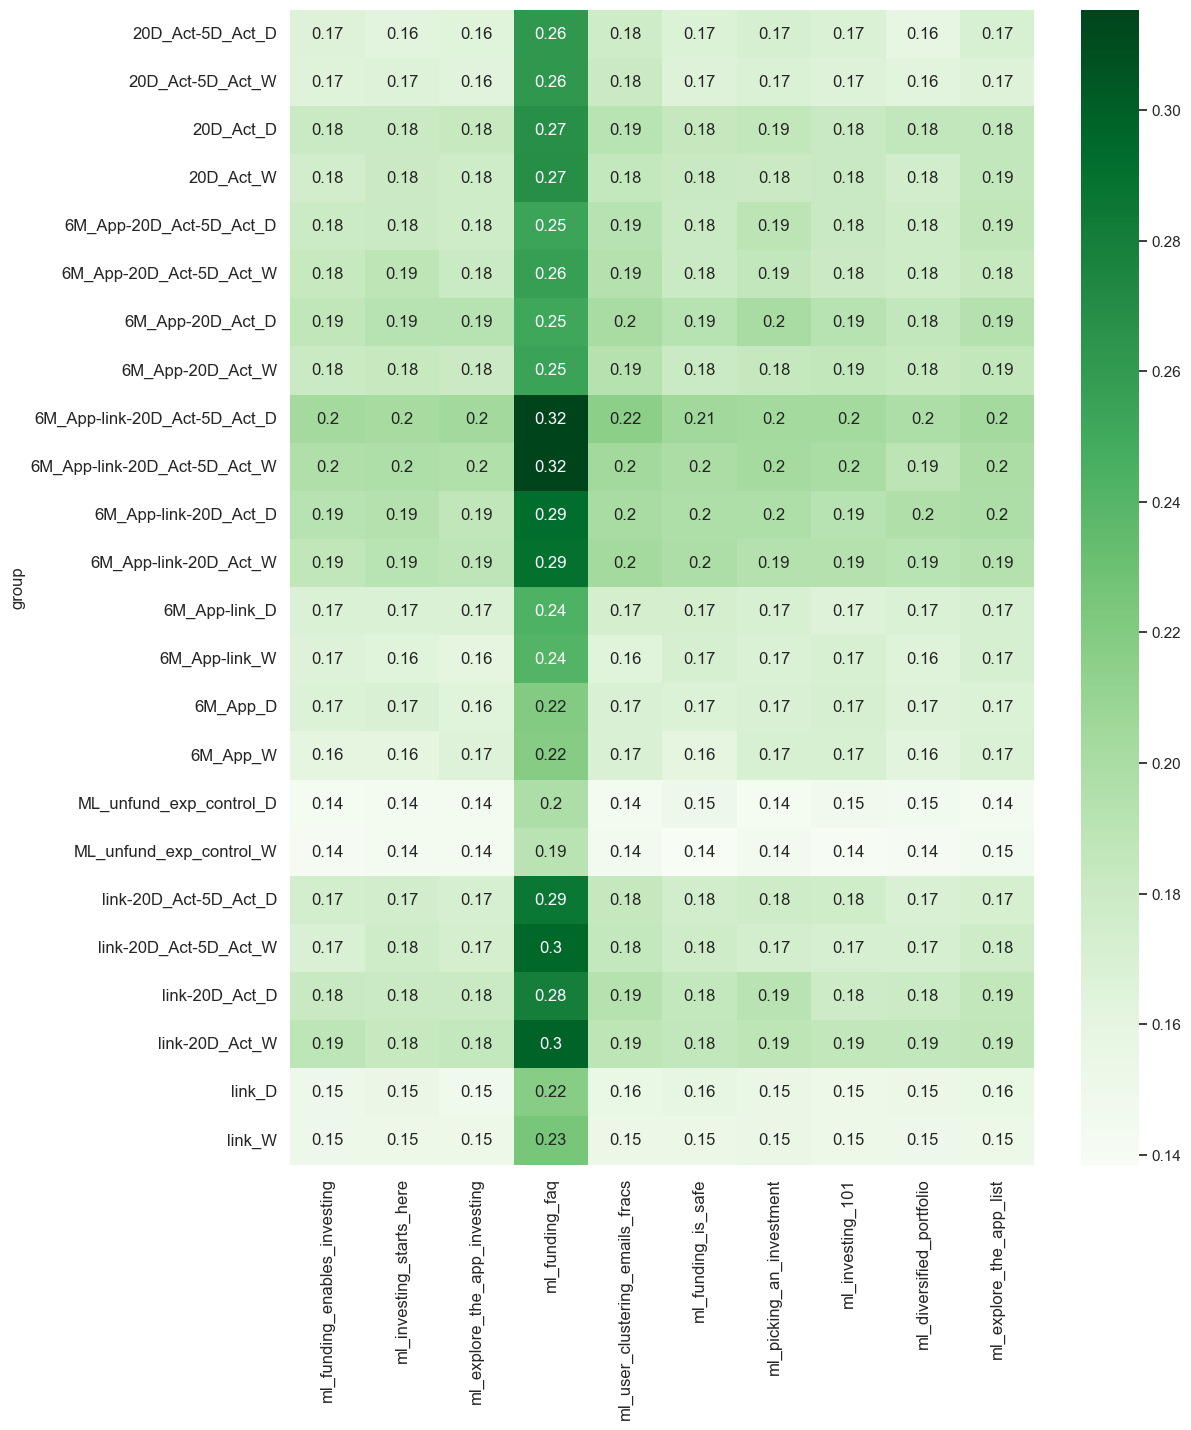

In [9]:
sns.set(rc={'figure.figsize':(12,15)})
sns.heatmap(open_rates, annot=True,cmap='Greens')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Just by open rates, we can tell that users are much more interested in funding FAQ than all other topics.

## 2. User segment correlation
Now, we are trying to see the correlation between user segments and open rates. What are the important user segment factors that correlate to Email open rate?

In [10]:
# correlation analysis on open rates
open_rates=open_rates.reset_index()
open_rates['daily_delivery']=open_rates['group'].str.contains('D')
open_rates['twice_a_week_delivery']=open_rates['group'].str.contains('_W')
open_rates['group']=open_rates['group'].str.strip('_D')
open_rates['group']=open_rates['group'].str.strip('_W')
open_rates=open_rates.rename(columns={'group':'group_name'})
open_rates.head()

,group_name,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list,daily_delivery,twice_a_week_delivery
0,20D_Act-5D_Act,0.165939,0.163058,0.164710,0.262532,0.176959,0.167004,0.171553,0.168336,0.158152,0.170918,True,False
1,20D_Act-5D_Act,0.165001,0.166262,0.163899,0.262368,0.180184,0.165736,0.168832,0.165896,0.163083,0.166474,True,True
2,20D_Act,0.181723,0.181460,0.183006,0.268066,0.191501,0.183780,0.186031,0.182467,0.184967,0.184855,True,False
3,20D_Act,0.175677,0.180598,0.178330,0.268779,0.184494,0.182677,0.180267,0.182079,0.175449,0.185445,True,True
4,6M_App-20D_Act-5D_Act,0.179627,0.181125,0.177652,0.253823,0.191775,0.180762,0.189102,0.182554,0.177647,0.186271,True,False


In [11]:
user_segment=pd.read_csv('sample_segment_groups.csv')
user_segment=user_segment.drop(columns=['Unnamed: 0','group_id'])
user_segment.head()

,approved_within6M_flag,link_flag,recent_activity_flag(20days),5day_trade_flag,user_uuid,group_name
0,False,False,False,False,4418550,ML_unfund_exp_control
1,False,False,True,False,314921,20D_Act
2,False,False,True,True,409786,20D_Act-5D_Act
3,False,True,False,False,941341,link
4,False,True,True,False,102541,link-20D_Act


In [12]:
open_rates_cor_df=open_rates.merge(user_segment,how='left',on='group_name')
open_rates_cor_df.head()

,group_name,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list,daily_delivery,twice_a_week_delivery,approved_within6M_flag,link_flag,recent_activity_flag(20days),5day_trade_flag,user_uuid
0,20D_Act-5D_Act,0.165939,0.163058,0.164710,0.262532,0.176959,0.167004,0.171553,0.168336,0.158152,0.170918,True,False,False,False,True,True,409786
1,20D_Act-5D_Act,0.165001,0.166262,0.163899,0.262368,0.180184,0.165736,0.168832,0.165896,0.163083,0.166474,True,True,False,False,True,True,409786
2,20D_Act,0.181723,0.181460,0.183006,0.268066,0.191501,0.183780,0.186031,0.182467,0.184967,0.184855,True,False,False,False,True,False,314921
3,20D_Act,0.175677,0.180598,0.178330,0.268779,0.184494,0.182677,0.180267,0.182079,0.175449,0.185445,True,True,False,False,True,False,314921
4,6M_App-20D_Act-5D_Act,0.179627,0.181125,0.177652,0.253823,0.191775,0.180762,0.189102,0.182554,0.177647,0.186271,True,False,True,False,True,True,233445


In [13]:
open_rates_cor_df[PO_number_list] = False

open_rates_cor = pd.DataFrame()
for e in PO_number_list:
    temp = open_rates_cor_df.copy()
    temp[e] = True
    temp['open_rate'] = open_rates[e]
    open_rates_cor = pd.concat([open_rates_cor, temp])

open_rates_cor = open_rates_cor.reset_index()
open_rates_cor = open_rates_cor.drop(columns = ['index'])
open_rates_cor.head()

,group_name,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list,daily_delivery,twice_a_week_delivery,approved_within6M_flag,link_flag,recent_activity_flag(20days),5day_trade_flag,user_uuid,open_rate
0,20D_Act-5D_Act,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,409786,0.165939
1,20D_Act-5D_Act,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,409786,0.165001
2,20D_Act,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,314921,0.181723
3,20D_Act,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,314921,0.175677
4,6M_App-20D_Act-5D_Act,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,True,233445,0.179627


<Axes: >

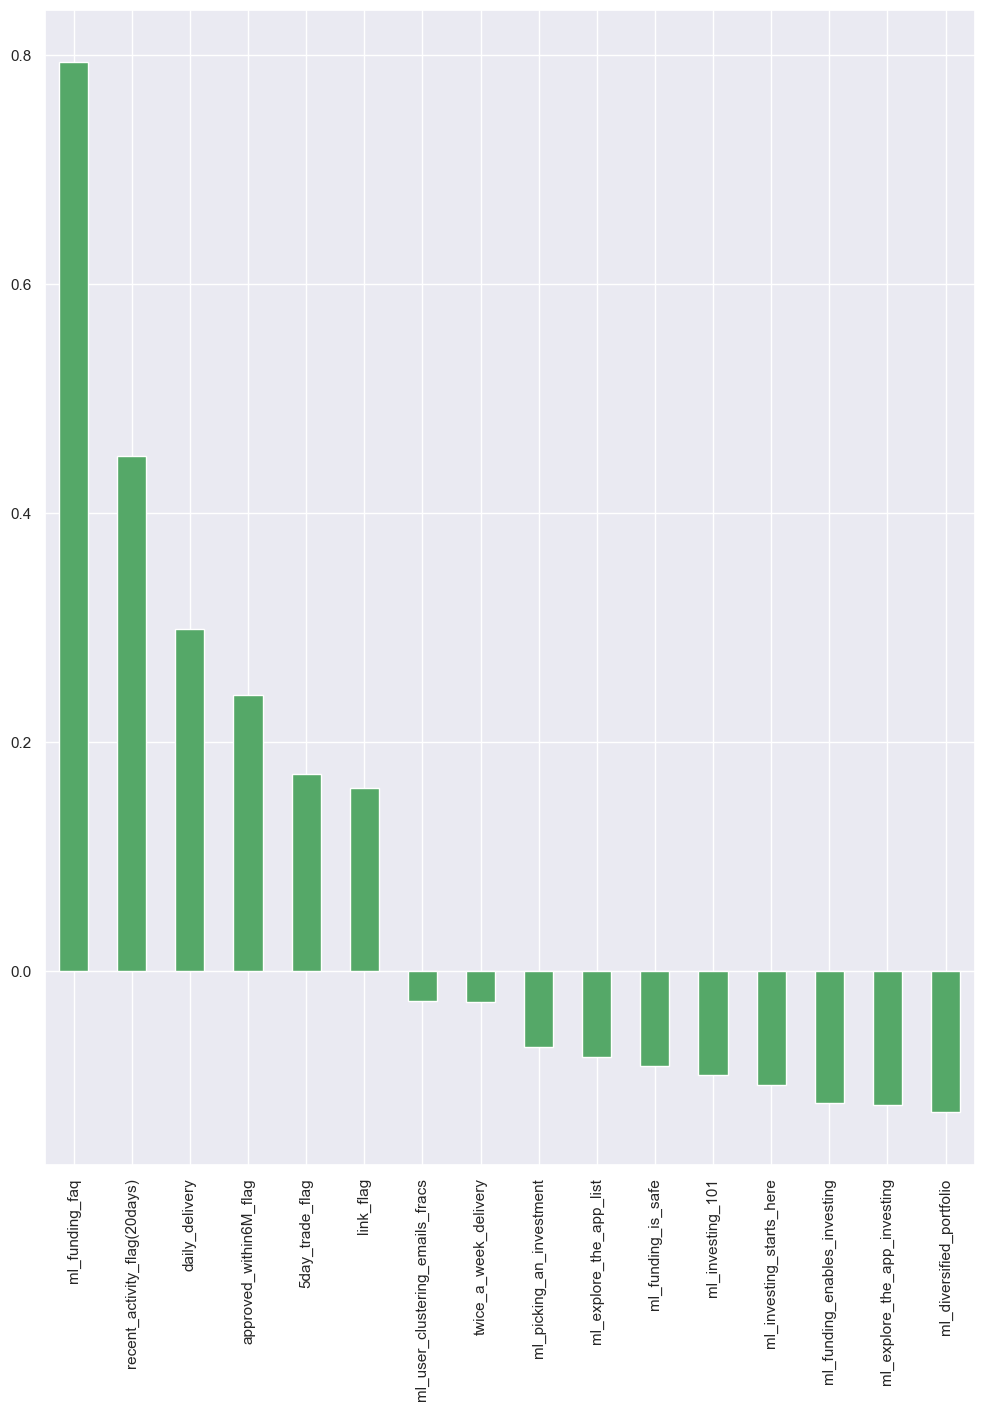

In [14]:
corr = open_rates_cor.drop(columns=['group_name']).corr()

correlation = corr['open_rate'].sort_values(ascending=False)
correlation=correlation.drop('open_rate')
correlation=correlation.drop('user_uuid')
correlation.plot.bar(color='g')

As we can see from the bar plots, users are again much more interested in funding FAQ than any other topics. Some topics even had a negative effects on email open rates.

## 3. Negative effects
Here we will see what negative effects this campaign had brought to users. We will consider the following as negative side effects:
1. Our emails got spammed.
2. Users unsubscribed our emails.

In [15]:
# side effects
side_effects=pd.DataFrame(columns=['group']+PO_number_list)
side_effects['group']=user_events['group_name']
side_effects[PO_number_list]=user_events[PO_number_list]
for topic in PO_number_list:
    side_effects[topic]=(side_effects[topic]=='unsubscribe') | (side_effects[topic]=='spamreport')
side_effects=side_effects.groupby('group').sum()
side_effects.head()

,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list
group,,,,,,,,,,
20D_Act-5D_Act_D,2,7,5,7,8,3,11,10,9,8
20D_Act-5D_Act_W,2,3,1,7,5,3,1,1,5,2
20D_Act_D,4,4,1,5,9,8,9,4,6,7
20D_Act_W,7,3,3,3,5,4,2,5,6,1
6M_App-20D_Act-5D_Act_D,5,4,3,4,7,4,4,3,3,5


In [16]:
neg_rates=side_effects/delivery
neg_rates.head()

,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,ml_diversified_portfolio,ml_explore_the_app_list
group,,,,,,,,,,
20D_Act-5D_Act_D,0.000104,0.000364,0.000260,0.000364,0.000416,0.000156,0.000571,0.000519,0.000468,0.000416
20D_Act-5D_Act_W,0.000115,0.000173,0.000058,0.000404,0.000289,0.000173,0.000058,0.000058,0.000288,0.000116
20D_Act_D,0.000210,0.000210,0.000052,0.000262,0.000472,0.000420,0.000472,0.000210,0.000315,0.000368
20D_Act_W,0.000407,0.000175,0.000175,0.000175,0.000293,0.000233,0.000117,0.000292,0.000350,0.000059
6M_App-20D_Act-5D_Act_D,0.000259,0.000207,0.000156,0.000207,0.000363,0.000207,0.000208,0.000156,0.000155,0.000259


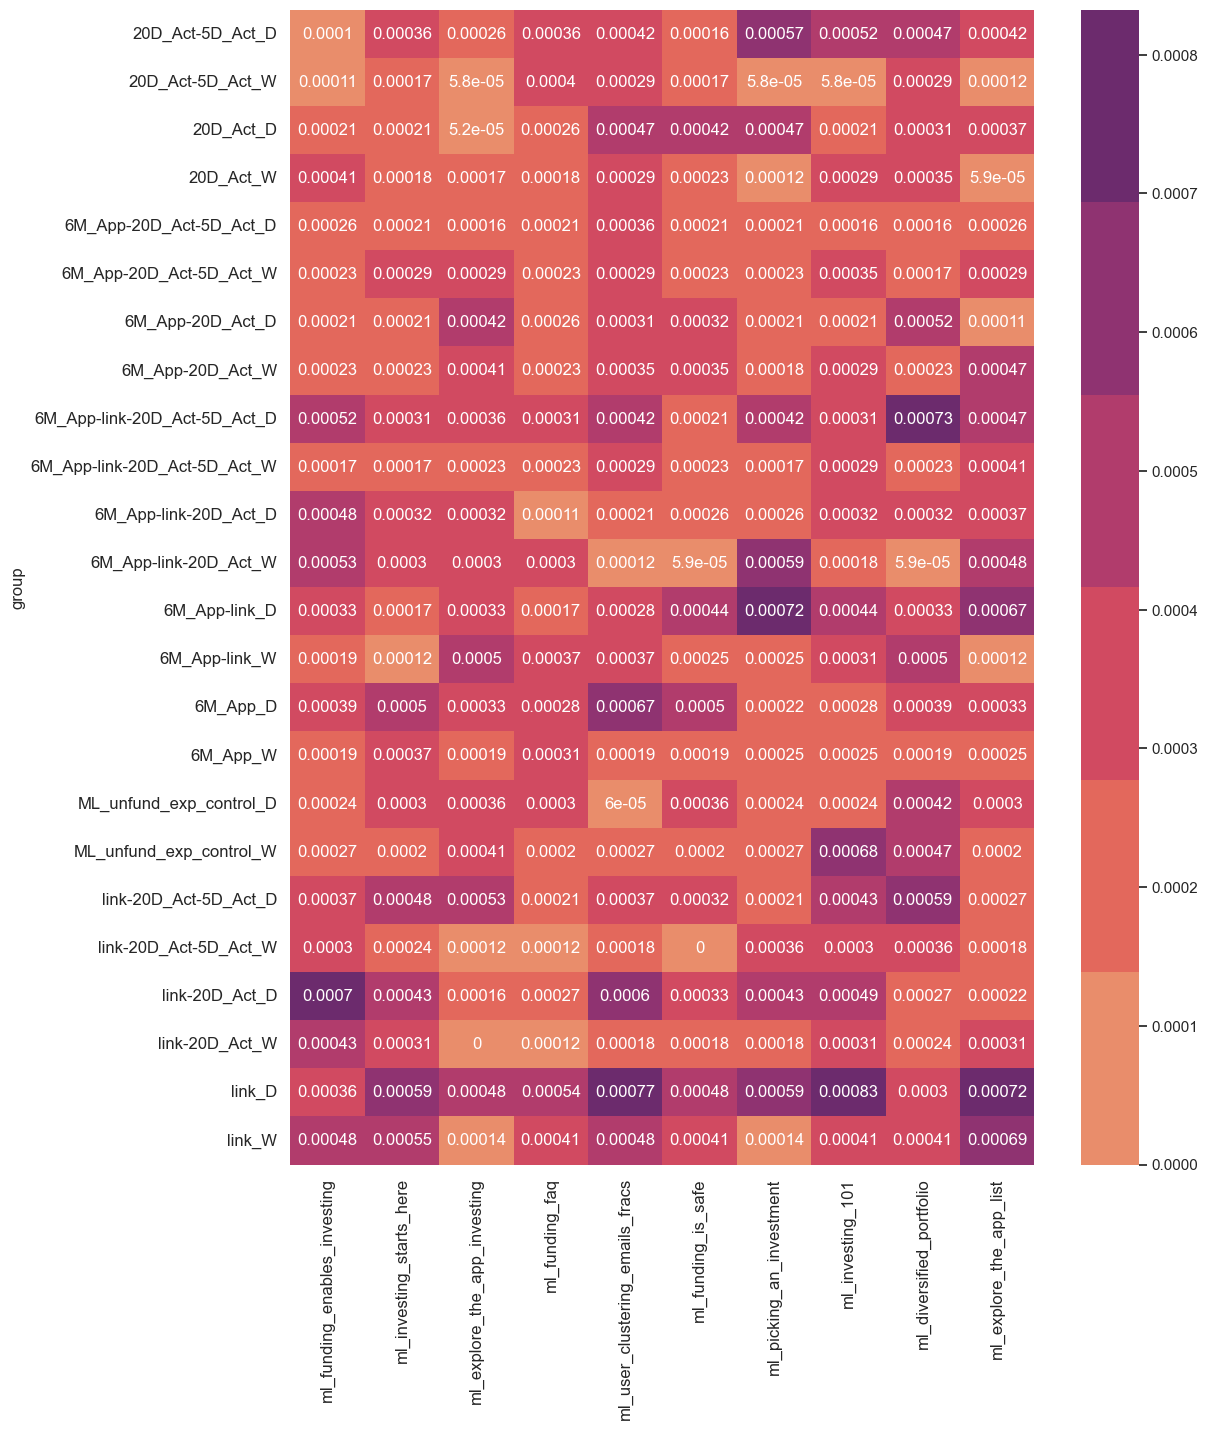

In [17]:
sns.set(rc={'figure.figsize':(12,15)})
sns.heatmap(neg_rates, annot=True,cmap=sns.color_palette("flare"))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The purple blocks demonstrated the negative effect (spam and unsubscription rates) caused by this email campaign.

## 4. Funding rates and linked rates in treatment groups}

In [32]:
# funding rates in treatment group
num_users_in_each_treatment_group=user_events[user_events['num_received_email']>0].groupby('group_name')['user_uuid'].count().reset_index()
funded_user=user_events[(user_events['num_received_email']>0) & (user_events['first_funded_at'].notnull())].groupby('group_name')['user_uuid'].count().reset_index()
funded_rate=funded_user['user_uuid']/num_users_in_each_treatment_group['user_uuid']


Here are the segments:

In [33]:
funded_user['group_name']

0                 20D_Act-5D_Act_D
1                 20D_Act-5D_Act_W
2                        20D_Act_D
3                        20D_Act_W
4          6M_App-20D_Act-5D_Act_D
5          6M_App-20D_Act-5D_Act_W
6                 6M_App-20D_Act_D
7                 6M_App-20D_Act_W
8     6M_App-link-20D_Act-5D_Act_D
9     6M_App-link-20D_Act-5D_Act_W
10           6M_App-link-20D_Act_D
11           6M_App-link-20D_Act_W
12                   6M_App-link_D
13                   6M_App-link_W
14                        6M_App_D
15                        6M_App_W
16         ML_unfund_exp_control_D
17         ML_unfund_exp_control_W
18           link-20D_Act-5D_Act_D
19           link-20D_Act-5D_Act_W
20                  link-20D_Act_D
21                  link-20D_Act_W
22                          link_D
23                          link_W
Name: group_name, dtype: object

And here are the funding rates in each segments:

<Axes: xlabel='[20D_Act-5D_Act_D, 20D_Act-5D_Act_W, 20D_Act_D, 20D_Act_W, 6M_App-20D_Act-5D_Act_D, 6M_App-20D_Act-5D_Act_W, 6M_App-20D_Act_D, 6M_App-20D_Act_W, 6M_App-link-20D_Act-5D_Act_D, 6M_App-link-20D_Act-5D_Act_W, 6M_App-link-20D_Act_D, 6M_App-link-20D_Act_W, 6M_App-link_D, 6M_App-link_W, 6M_App_D, 6M_App_W, ML_unfund_exp_control_D, ML_unfund_exp_control_W, link-20D_Act-5D_Act_D, link-20D_Act-5D_Act_W, link-20D_Act_D, link-20D_Act_W, link_D, link_W]'>

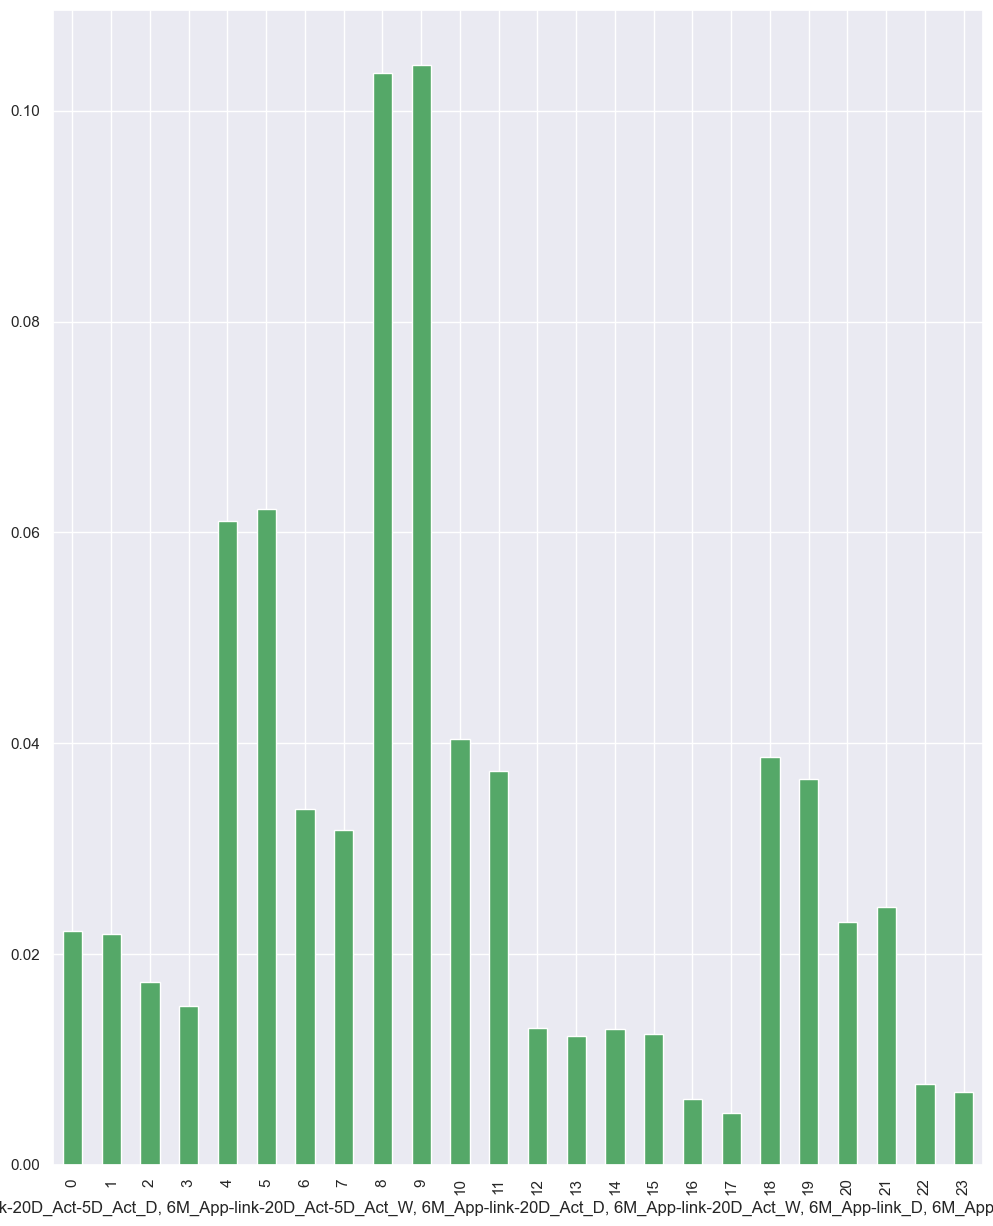

In [29]:
funded_rate.plot.bar(color='g',xlabel=funded_user['group_name'])

In particular, the funding rates in group 8 and group 9 (users that linked their accounts in the past 6 months and used the apps in the past 5 days) are much higher than others. 

Now let's see the linked rates in each treatment group by similar methods:

<Axes: xlabel='[20D_Act-5D_Act_D, 20D_Act-5D_Act_W, 20D_Act_D, 20D_Act_W, 6M_App-20D_Act-5D_Act_D, 6M_App-20D_Act-5D_Act_W, 6M_App-20D_Act_D, 6M_App-20D_Act_W, 6M_App-link-20D_Act-5D_Act_D, 6M_App-link-20D_Act-5D_Act_W, 6M_App-link-20D_Act_D, 6M_App-link-20D_Act_W, 6M_App-link_D, 6M_App-link_W, 6M_App_D, 6M_App_W, ML_unfund_exp_control_D, ML_unfund_exp_control_W, link-20D_Act-5D_Act_D, link-20D_Act-5D_Act_W, link-20D_Act_D, link-20D_Act_W, link_D, link_W]'>

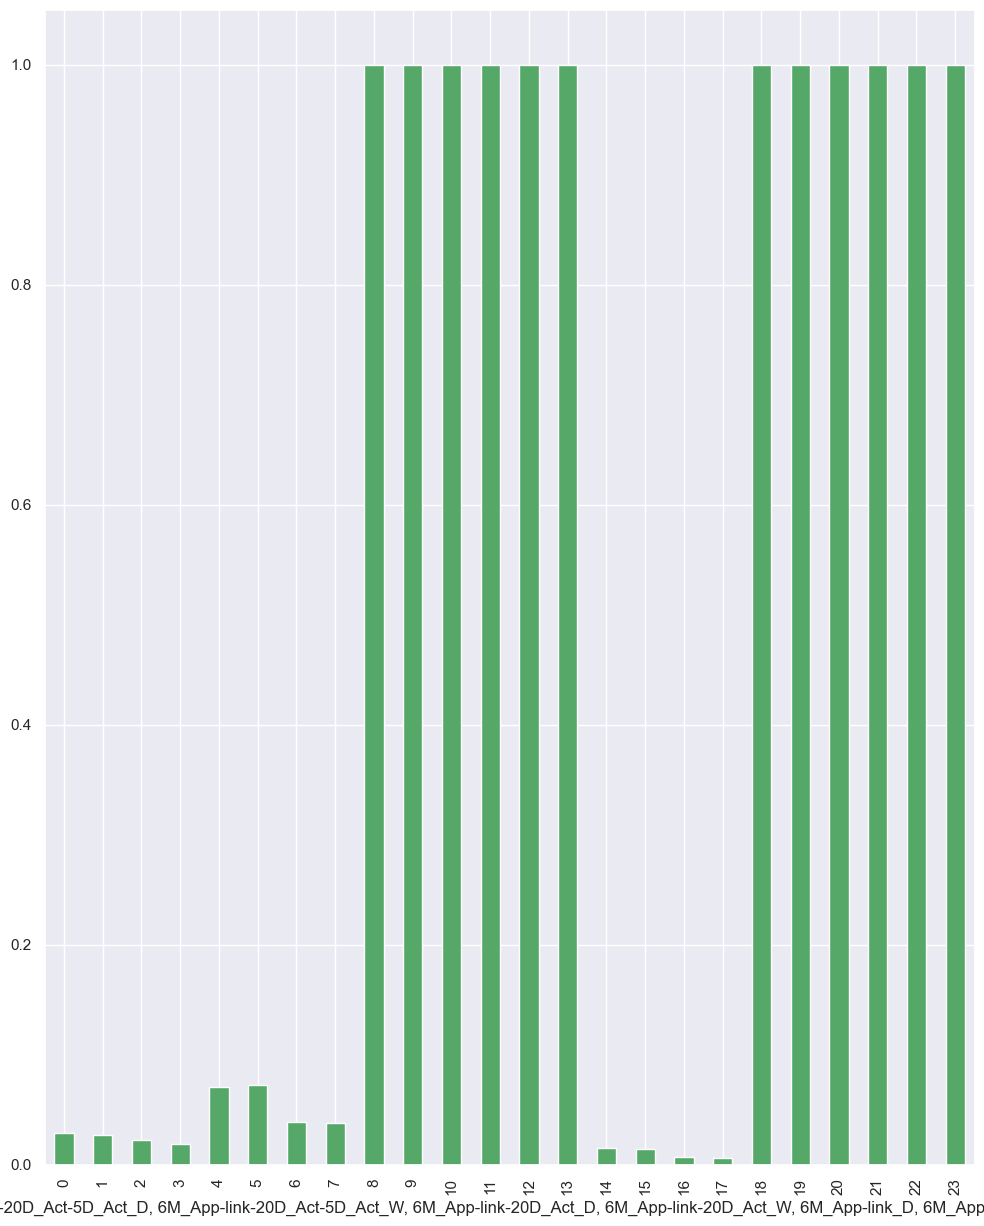

In [19]:
# linked rates in treatment group
linked_user=user_events[(user_events['num_received_email']>0) & (user_events['first_linked_bank_account_at'].notnull())].groupby('group_name')['user_uuid'].count().reset_index()
linked_rate=linked_user['user_uuid']/num_users_in_each_treatment_group['user_uuid']
linked_rate.plot.bar(color='g',xlabel=linked_user['group_name'])

Despite the segments where users have already linked their accounts (8 - 13, 18 - 23), we can see that users in group 4 and group 5 (users that created accounts in the past 6 months and used the apps in the past 5 days) have significantly higher link rates compared to other groups.

## 5. A/B Testing
Now we will see if this email campaign actually lifted funding rates.

We will set the null hypothesis to be "this campaign has no impact on funding rates" and alternative hypothesis to be "this campaign has positive impact on funding rates'.

We will see if we can reject the null hypothesis with 0.95 confidence (alpha=0.05).

The following will be our control group:

In [34]:
# ab testing
control_group=pd.read_csv('control_groups_rate.csv')
control_group.head()

,group_name,num_users_in_control,num_funded_in_control,funding_rate_in_control,num_link_in_control,link_rate_in_control
0,20D_Act-5D_Act_D,369786,7802,0.021099,9899,0.026770
1,20D_Act_D,274921,4053,0.014742,5143,0.018707
2,6M_App-20D_Act-5D_Act_D,193445,11556,0.059738,13396,0.069250
3,6M_App-20D_Act_D,178938,5636,0.031497,6570,0.036717
4,6M_App-link-20D_Act-5D_Act_D,29697,3047,0.102603,29697,1.000000


And the following will be our experiment group:

In [35]:
exp_group=user_events[user_events['num_received_email']>0].groupby('group_name')['user_uuid'].count().reset_index()
exp_group=exp_group.rename(columns={'user_uuid':'num_users_in_exp'})
exp_group['num_funded_in_exp']=funded_user['user_uuid']
exp_group['funding_rate_in_exp']=funded_rate
exp_group['num_link_in_exp']=linked_user['user_uuid']
exp_group['linked_rate_in_exp']=linked_rate
exp_group.head()

,group_name,num_users_in_exp,num_funded_in_exp,funding_rate_in_exp,num_link_in_exp,linked_rate_in_exp
0,20D_Act-5D_Act_D,18918,420,0.022201,548,0.028967
1,20D_Act-5D_Act_W,18966,416,0.021934,514,0.027101
2,20D_Act_D,18606,323,0.017360,419,0.022520
3,20D_Act_W,18711,282,0.015071,360,0.019240
4,6M_App-20D_Act-5D_Act_D,18927,1156,0.061077,1346,0.071115


Merge the two groups for Z-score testing:

In [36]:
exp_merge=exp_group.merge(control_group,how='left',on='group_name')
exp_merge=exp_merge.ffill()
exp_merge.head()

,group_name,num_users_in_exp,num_funded_in_exp,funding_rate_in_exp,num_link_in_exp,linked_rate_in_exp,num_users_in_control,num_funded_in_control,funding_rate_in_control,num_link_in_control,link_rate_in_control
0,20D_Act-5D_Act_D,18918,420,0.022201,548,0.028967,369786.0,7802.0,0.021099,9899.0,0.026770
1,20D_Act-5D_Act_W,18966,416,0.021934,514,0.027101,369786.0,7802.0,0.021099,9899.0,0.026770
2,20D_Act_D,18606,323,0.017360,419,0.022520,274921.0,4053.0,0.014742,5143.0,0.018707
3,20D_Act_W,18711,282,0.015071,360,0.019240,274921.0,4053.0,0.014742,5143.0,0.018707
4,6M_App-20D_Act-5D_Act_D,18927,1156,0.061077,1346,0.071115,193445.0,11556.0,0.059738,13396.0,0.069250


Here's the Z-test function I'll use:

In [23]:
from statsmodels.stats.proportion import proportions_ztest
def pval(df):
    zscore,pval=proportions_ztest(df['num_funded_in_exp'],df['num_users_in_exp'],value=df['funding_rate_in_control'],alternative='larger')
    return pval

And here are the results:

In [37]:
exp_merge['p_value']=exp_merge.apply(pval,axis=1)
exp_merge['significance']=exp_merge['p_value']<0.05
exp_merge[['group_name','p_value','significance']]

,group_name,p_value,significance
0,20D_Act-5D_Act_D,0.151715,False
1,20D_Act-5D_Act_W,0.216112,False
2,20D_Act_D,0.003131,True
3,20D_Act_W,0.355953,False
4,6M_App-20D_Act-5D_Act_D,0.220896,False
5,6M_App-20D_Act-5D_Act_W,0.079210,False
6,6M_App-20D_Act_D,0.041724,True
7,6M_App-20D_Act_W,0.411567,False
8,6M_App-link-20D_Act-5D_Act_D,0.331835,False
9,6M_App-link-20D_Act-5D_Act_W,0.215857,False


We are getting a mixed result here. We can't say that this email campaign is very effective. Emails delivered twice a week performed significantly worse than emails delivered daily.

The following is the visualization of funding rates in each control group and experiment group:

<Axes: xlabel='[20D_Act-5D_Act_D, 20D_Act-5D_Act_W, 20D_Act_D, 20D_Act_W, 6M_App-20D_Act-5D_Act_D, 6M_App-20D_Act-5D_Act_W, 6M_App-20D_Act_D, 6M_App-20D_Act_W, 6M_App-link-20D_Act-5D_Act_D, 6M_App-link-20D_Act-5D_Act_W, 6M_App-link-20D_Act_D, 6M_App-link-20D_Act_W, 6M_App-link_D, 6M_App-link_W, 6M_App_D, 6M_App_W, ML_unfund_exp_control_D, ML_unfund_exp_control_W, link-20D_Act-5D_Act_D, link-20D_Act-5D_Act_W, link-20D_Act_D, link-20D_Act_W, link_D, link_W]'>

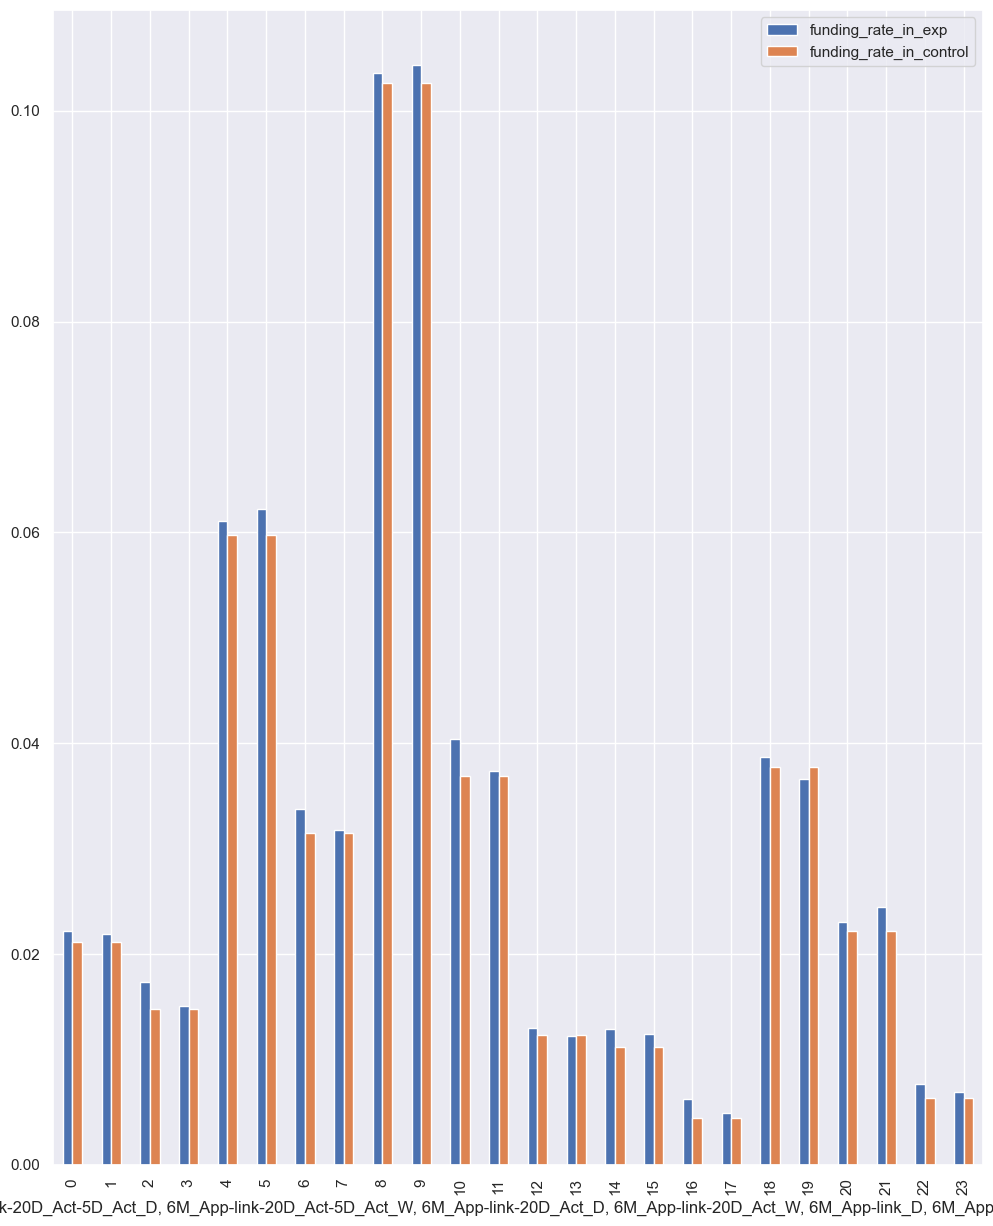

In [26]:
exp_merge[['funding_rate_in_exp','funding_rate_in_control']].plot.bar(xlabel=exp_merge['group_name'])

We see a not-so-impressive lift in most of the experiment groups, even though statistical tests did not support so.

## 6. Time Series Analysis

In [38]:
# time series
user_events.head()

,user_uuid,group_name,ml_funding_enables_investing,ml_investing_starts_here,ml_explore_the_app_investing,ml_funding_faq,ml_user_clustering_emails_fracs,ml_funding_is_safe,ml_picking_an_investment,ml_investing_101,...,approved_at,first_funded_at,first_linked_bank_account_at,5d_trading_avg_event_count,2d_non_trading_avg_event_count,20d_trading_avg_event_count,8d_non_trading_avg_event_count,1d_trading_avg_event_count,1d_non_trading_avg_event_count,num_received_email
0,id_2623238174270264636,ML_unfund_exp_control_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-01-14 16:31:59.295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id_14752263936159847779,ML_unfund_exp_control_D,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,2019-01-29 16:22:26.866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
2,id_3723259155072282145,ML_unfund_exp_control_D,delivered,delivered,open,open,open,delivered,delivered,delivered,...,2019-02-01 00:01:48.853,2020-12-04 20:41:55.146,2020-12-04 20:41:37.842,53.0,NaN,171.0,NaN,NaN,NaN,6
3,id_9433964625840258739,ML_unfund_exp_control_D,delivered,delivered,delivered,delivered,delivered,delivered,delivered,delivered,...,2020-03-17 21:02:43.906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
4,id_17251718038176858460,ML_unfund_exp_control_D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-12-30 18:23:15.726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


The following time series will be skipped here as they are sensitive information to be displayed.